In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
from IPython.display import Latex
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [10]:
def task1() -> None:
    t = Symbol('t')
    x = Sin(t) - t*Cos(t)
    y = Cos(t) + t*Sin(t)
    
    dx_dt = diff(x, t)
    dy_dt = diff(y, t)
    dy_dx = dy_dt / dx_dt
    display(Latex(f"y'_x = {latex(dy_dx)}"))

    ddx_dtt = diff(dx_dt, t)
    ddy_dtt = diff(dy_dt, t)
    ddy_dxx = ((dx_dt*ddy_dtt) - (ddx_dtt*dy_dt))/(dx_dt**3)
    display(Latex(f"y''_{{xx}} = {latex(ddy_dxx)}"))
    
if __name__ == "__main__":
    task1()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [3]:
from sympy.calculus.singularities import singularities

def process_diff_func(func, k: int, symbol) -> None:
  display(Latex(f"""y{"'"*k}_{{{'x'*k}}} = {latex(func)}"""))
  
  num, den = fraction(func)
  display(Latex(fr"\text{{Нули производной {k} порядка:}}"))
  dy_nulls = solveset(num, symbol)
  if dy_nulls:
    display(*dy_nulls)
  else:
    display(Latex(r"\text{{Производная не обращается в ноль}}"))
  
  display(Latex(fr"\text{{Точки, в которых функция не существует:}}"))
  ddy_nulls = solveset(den, symbol)
  if ddy_nulls:
    display(*ddy_nulls)
  else:
    display(Latex(r"\text{{Производная определена на всей числовой оси}}"))
  print()

def task2() -> None:
  t = Symbol('t')
  x = t*t - 2*t
  y = t*t + 2*t

  dx_dt = diff(x, t)
  dy_dt = diff(y, t)
  dy_dx = dy_dt / dx_dt
  process_diff_func(dy_dx, 1, t)

  ddx_dtt = diff(dx_dt, t)
  ddy_dtt = diff(dy_dt, t)
  ddy_dxx = ((dx_dt*ddy_dtt) - (dy_dt*ddx_dtt))/(dx_dt**3)
  process_diff_func(ddy_dxx, 2, t)

if __name__ == "__main__":
  task2()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

-1

<IPython.core.display.Latex object>

1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1

### Задание 3. 
Найти точки экстремума и точки перегиба функции Задания 2.

In [11]:
from sympy.calculus.singularities import singularities

def task3() -> None:
  t = Symbol('t')
  x = t*t - 2*t
  y = t*t + 2*t

  dx_dt = diff(x, t)
  dy_dt = diff(y, t)
  dy_dx = dy_dt / dx_dt
  num, _ = fraction(dy_dx)
  display(Latex(fr"\text{{Точки экстремума }}y_x:"))
  display(*solveset(num, t))

  ddx_dtt = diff(dx_dt, t)
  ddy_dtt = diff(dy_dt, t)
  ddy_dxx = ((dx_dt*ddy_dtt) - (dy_dt*ddx_dtt))/(dx_dt**3)
  num_ddy, _ = fraction(ddy_dxx)
  ddy_nulls = solve(num_ddy, t)
  EPSILON: float = 0.05
  points = [root for root in ddy_nulls if ddy_dxx.subs({t: root + EPSILON}) * ddy_dxx.subs({t: root - EPSILON}) < 0]
  display(Latex(fr"\text{{Точки перегиба }}y_x:"))
  if points:
    display(*points)
  else:
    display(Latex(r"\text{Функция не меняет кривизну}"))


if __name__ == "__main__":
  task3()

<IPython.core.display.Latex object>

-1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно. 
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [12]:
def task4() -> None:
  t = Symbol('t')
  x = sympy.exp(t)
  y = t*sympy.exp(2*t)
  
  dx_dt = diff(x, t)
  dy_dt = diff(y, t)
  dy_dx = dy_dt / dx_dt
  ddx_dtt = diff(dx_dt, t)
  ddy_dtt = diff(dy_dt, t)
  ddy_dxx = ((dx_dt*ddy_dtt) - (dy_dt*ddx_dtt))/(dx_dt**3)

  num, _ = fraction(ddy_dxx)
  ddy_nulls = solve(num, t)
  EPSILON: float = 0.05
  points = [root for root in ddy_nulls if ddy_dxx.subs({t: root + EPSILON}) * ddy_dxx.subs({t: root - EPSILON}) < 0]
  display(Latex(fr"\text{{Точки перегиба }}y_x:"))
  if points:
    display(*points)
  else:
    display(Latex(r"\text{Функция не меняет кривизну}"))

if __name__ == "__main__":
  task4()

<IPython.core.display.Latex object>

-3/2

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

Вариант 50
$$
x = 2e^t+ 2e^{−t}\\
y = 5e^t−5e^{−t}
$$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

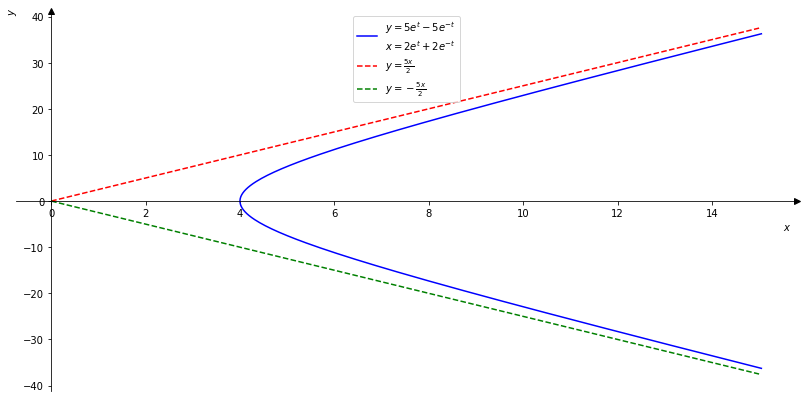

In [108]:
def config_ax(ax):
    ax.set_xlabel(xlabel="\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t$x$", labelpad=4)
    ax.set_ylabel(ylabel="\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t$y$", labelpad=4)
    plt.rcParams['figure.figsize'] = [14, 7]
    ax.legend(loc="upper center")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

def task5() -> None:
    t = Symbol('t')
    x = 2*sympy.exp(t) + 2*sympy.exp(-t)
    y = 5*sympy.exp(t) - 5*sympy.exp(-t)

    t0_pos = sympy.S.Infinity
    x_t_pos_lim = limit(e=x, z=t, z0=t0_pos)
    display(Latex(fr"\lim_{{t\to +\infty}} x_t = {latex(x_t_pos_lim)}"))
    y_t_pos_lim = limit(e=y, z=t, z0=t0_pos)
    display(Latex(fr"\lim_{{t\to +\infty}} y_t = {latex(y_t_pos_lim)}"))

    x0, y0 = Symbol('x'), Symbol('y')
    k1 = limit(e=y/x, z=t, z0=t0_pos)
    b1 = limit(e=y-k1*x, z=t, z0=t0_pos)
    asympt_eq1 = lambda x0: k1*x0+b1
    display(Latex(fr"\text{{Первая асимптота: }}{latex(sympy.Eq(y0, asympt_eq1(x0), evaluate=False))}"))
    

    t0_neg = sympy.S.NegativeInfinity
    x_t_neg_lim = limit(e=x, z=t, z0=t0_neg)
    display(Latex(fr"\lim_{{t\to -\infty}} x_t = {latex(x_t_neg_lim)}"))
    y_t_neg_lim = limit(e=y, z=t, z0=t0_neg)
    display(Latex(fr"\lim_{{t\to -\infty}} y_t = {latex(y_t_neg_lim)}"))

    k2 = limit(e=y/x, z=t, z0=t0_neg)
    b2 = limit(e=y-k2*x, z=t, z0=t0_neg)
    asympt_eq2 = lambda x0: k2*x0+b2
    display(Latex(fr"\text{{Вторая асимптота: }}{latex(sympy.Eq(y0, asympt_eq2(x0), evaluate=False))}"))

    ax = plt.gca()
    space = np.linspace(-2, 2, 200)
    ax.plot(
        2*np.exp(space) + 2*np.exp(-space),
        5*np.exp(space) - 5*np.exp(-space),
        color='b',
        label=f"$y = {latex(y)}$\n$x = {latex(x)}$"
    )
    asymptots_space = np.linspace(0, 15, 500)
    ax.plot(
        asymptots_space,
        asympt_eq1(asymptots_space),
        color='r',
        linestyle="--",
        label=f"$y = {latex(asympt_eq1(x0))}$"
    )    
    ax.plot(
        asymptots_space,
        asympt_eq2(asymptots_space),
        color='g',
        linestyle="--",
        label=f"$y = {latex(asympt_eq2(x0))}$"
    )
    config_ax(ax)

if __name__ == "__main__":
    task5()